Decision Trees in Python with Scikit-Learn
-------------------------------------------------------------

Introduction
-----------------
A decision tree is one of most frequently and widely **used supervised machine learning algorithms that can perform both regression and classification tasks**. Hence called <font color='green'><b>CART</b> - <u>C</u>lassification <u>A</u>nd <u>R</u>egression <u>T</u>rees.</font>

For each attribute in the dataset, the decision tree algorithm forms a node, where the most important attribute is placed at the root node. For evaluation we start at the root node and work our way down the tree by following the corresponding node that meets our condition or "decision". This process continues until a leaf node is reached, which contains the prediction or the outcome of the decision tree.



>**Advantages of Decision Trees**
------------------------------

There are several advantages of using decision trees for predictive analysis:

1> Decision trees can be used to predict both continuous and discrete values i.e. they work well for both regression and classification tasks.

2> They require relatively less effort for training the algorithm.

3> They can be used to classify non-linearly separable data.

4> They're very fast and efficient compared to KNN and other classification algorithms.


# 1. Decision Tree for Classification
---------------------------------------------------------
<b><font color='green'>( We will be using DecisionTreeClassifier from sklearn.tree.</b> It is fast, simple and takes care of all the Math part. We will concentrate only on Coding and solving the Real time problem. )</font><br><br>
<font color='red'>
Here, we will predict whether a <b>bank note is authentic or fake</b> depending upon the four different attributes of the image of the note. The <u>attributes</u> are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.</font>

**Note :** In the dataset the **class** variable can be **0 or 1**. **0 indicates authentic BankNote and 1 indicates fake BankNote.**
Path of the data file: https://drive.google.com/file/d/1ktbD0OlFwjBwlGoanUrYVtwRILSvleNd/view?usp=drive_link

In [1]:
# doing the minimum necessary imports
# more modules would be imported as and when needed

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# reading data from CSV file. 
# reading bank currency note data into pandas dataframe.
bankdata = pd.read_csv("bill_authentication.csv")  

# Exploratory Data Analysis
print(bankdata.shape)  
print("------------")

# printing the first 5 records of the dataset
print(bankdata.head()) 

(1372, 5)
------------
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
bankdata.info()  # this helps in finding any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<b> Analysis : </b> There is no missing data. This data is clean.

In [5]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.

# To divide the data into attributes and labels, do :
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class'] 
print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


In [7]:
# the final preprocessing step is to divide data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)
# default test_size parameter value is 0.25

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 4)
(343, 4)
(1029,)
(343,)


In [9]:
# Training the Algorithm. Here we would use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)
print(classifier)

DecisionTreeClassifier()


[Text(0.5057692307692307, 0.9444444444444444, 'x[0] <= 0.32\ngini = 0.495\nsamples = 1029\nvalue = [564, 465]'),
 Text(0.3153846153846154, 0.8333333333333334, 'x[1] <= 5.865\ngini = 0.308\nsamples = 500\nvalue = [95, 405]'),
 Text(0.16923076923076924, 0.7222222222222222, 'x[2] <= 6.219\ngini = 0.104\nsamples = 398\nvalue = [22, 376]'),
 Text(0.06153846153846154, 0.6111111111111112, 'x[1] <= 4.085\ngini = 0.007\nsamples = 276\nvalue = [1, 275]'),
 Text(0.03076923076923077, 0.5, 'gini = 0.0\nsamples = 264\nvalue = [0, 264]'),
 Text(0.09230769230769231, 0.5, 'x[2] <= 1.831\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.06153846153846154, 0.3888888888888889, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.12307692307692308, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.27692307692307694, 0.6111111111111112, 'x[1] <= -4.675\ngini = 0.285\nsamples = 122\nvalue = [21, 101]'),
 Text(0.2153846153846154, 0.5, 'x[0] <= -0.357\ngini = 0.02\nsamples = 101\nv

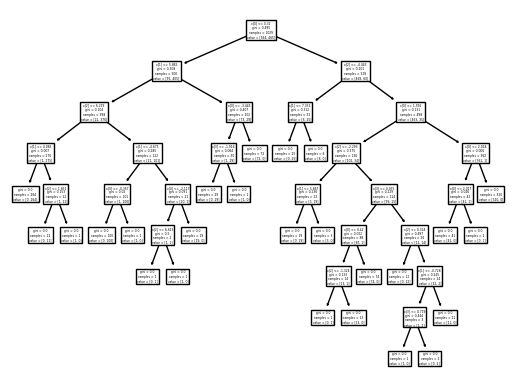

In [19]:
from sklearn import tree
tree.plot_tree(classifier)

In [23]:
plt.savefig('out.pdf')

<Figure size 640x480 with 0 Axes>

In [11]:
# make predictions on the test data
y_pred = classifier.predict(X_test)
print(y_pred.shape)

(343,)


In [13]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

# Remember : for evaluating classification-based ML algorithm, use  
# confusion_matrix, classification_report and accuracy_score.

# And for evaluating regression-based ML algorithm, use Mean Squared Error(MSE) 
# or RMSE (Root Mean Squared Error) or R2 Score.

[[197   1]
 [  3 142]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       0.99      0.98      0.99       145

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

0.9883381924198251


<b><font color='green'>Analysis</font></b> : From the confusion matrix, you can see that out of 343 test instances, our algorithm misclassified only 4. This is approx 99% accuracy. 